# Population Pyramid and TFR Modelling

#### Navigating to the right folder

In [1]:
cd /media/pranshumaan/TOSHIBA\ EXT

/media/pranshumaan/TOSHIBA EXT


In [2]:
cd Dev/TFR_Modelling/

/media/pranshumaan/TOSHIBA EXT/Dev/TFR_Modelling


#### Problem statement

In [3]:
cat problem_statement.txt
















4. Can sex ratio / gender imbalance be incorporated?

#### Creating a generic looking population pyramid

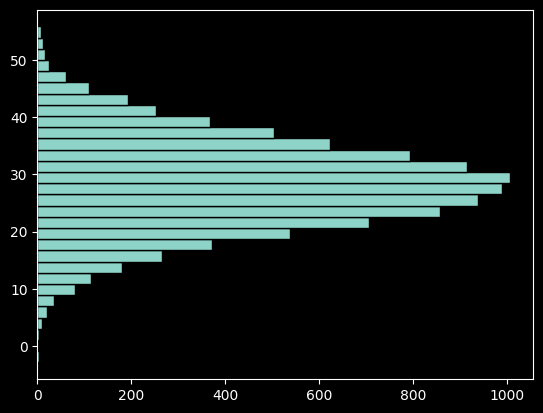

In [4]:
from matplotlib import pyplot as plt
import numpy as np

sample = np.random.normal(28.2, 8,size=10000)
# Note: Mean has been selected based on Indian population mean age, std deviation selected so as to avoid negative buckets
# Normal distribution assumed for ease

plt.style.use('dark_background')

ax1 = plt.subplot(1, 1, 1)
ax1.hist(sample, bins=30, orientation="horizontal", edgecolor="black");

plt.show()

#### Creating a genderwise distribution

In [5]:
from matplotlib import pyplot as plt
import numpy as np

def population_plotter(male_population_mean=28.2, male_population_sd=12, male_population_size=10000,
                       female_population_mean=28.2, female_population_sd=12, female_population_size=1000):

    male_sample = np.random.normal(male_population_mean, male_population_sd,male_population_size)
    female_sample = np.random.normal(female_population_mean, female_population_sd,female_population_size)

    #Removing negative values
    male_sample = [element for element in male_sample if element>0]
    female_sample = [element for element in female_sample if element>0]

    plt.style.use('dark_background')
    
    ax1 = plt.subplot(1, 2, 2)
    ax1.hist(male_sample, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
    ax1.title.set_text("Male Population Distribution")


    ax2 = plt.subplot(1, 2, 1)
    ax2.hist(female_sample, bins=30, orientation="horizontal", edgecolor="black", color="pink")
    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_yticklabels([])
    ax2.yaxis.tick_right()
    ax2.title.set_text("Female Population Distribution")

    plt.show()
    return male_sample, female_sample

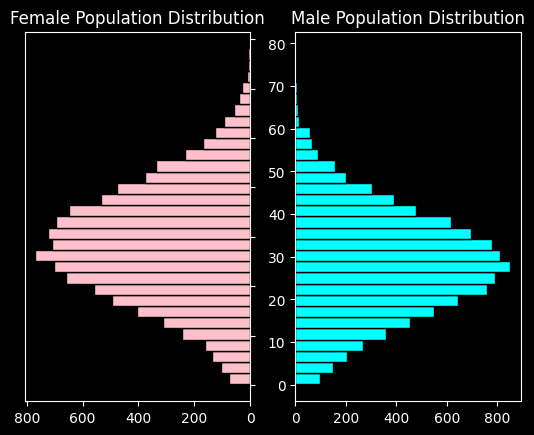

In [6]:
male_sample, female_sample = population_plotter(male_population_mean=28,
                                                male_population_sd=13,
                                                male_population_size=10000,
                                                female_population_mean=28,
                                                female_population_sd=12,
                                                female_population_size=10000,
                                               )

In [7]:
len(male_sample), len(female_sample)

(9828, 9897)

#### Incorporating TFR
From Wikipedia:
>The TFR represents the average number of children a female would potentially have, were they to fast-forward through all their childbearing years in a single year, under all the age-specific fertility rates for that year. In other words, this rate is the number of children a female would have if they were subject to prevailing fertility rates at all ages from a single given year and survived throughout their childbearing years.

>The TFR is, therefore, a measure of the fertility of an imaginary female who passes through their reproductive life subject to all the age-specific fertility rates for ages 15–49 that were recorded for a given population in a given year.

In terms of modelling implication, for every cohort of females between 15 and 49, we can say the following:
* Remaining reproductive years are: REM_PROD_YEARS = 50 - CURRENT_AGE
* Over these years, TFR number of children will be produced
* Thus, every year, number of children produced will be: sum of ((TFR by cohort X Population of cohort) / REM_PROD_YEARS)
* Of this, half will be male and half female (assuming a 50% sex ratio)

In [8]:
reproductive_cohort = [element for element in female_sample if (element >=15 and element <50)]
len(reproductive_cohort)

8287

#### Visualizing the reproductive cohort

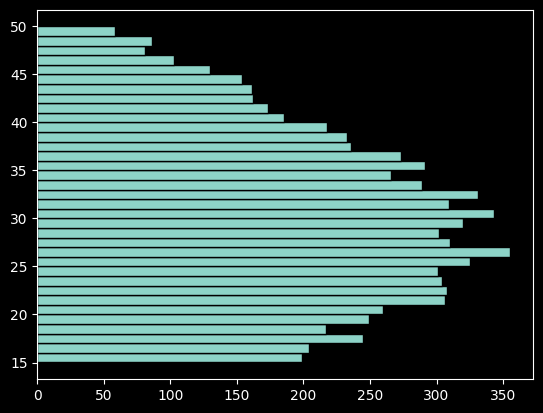

In [9]:
sample = reproductive_cohort
# Note: Mean has been selected based on Indian population mean age, std deviation selected so as to avoid negative buckets
# Normal distribution assumed for ease

plt.style.use('dark_background')

ax1 = plt.subplot(1, 1, 1)
ax1.hist(sample, bins=35, orientation="horizontal", edgecolor="black");

plt.show()

#### Sanity checking

In [10]:
counts, bin_edges = np.histogram(reproductive_cohort, bins=35)
counts, bin_edges, len(counts)

(array([199, 204, 245, 217, 249, 260, 306, 308, 304, 301, 325, 355, 310,
        302, 320, 343, 309, 331, 289, 266, 291, 273, 236, 233, 218, 185,
        173, 162, 161, 154, 130, 103,  81,  86,  58]),
 array([15.00291475, 16.00276716, 17.00261957, 18.00247198, 19.00232438,
        20.00217679, 21.0020292 , 22.0018816 , 23.00173401, 24.00158642,
        25.00143882, 26.00129123, 27.00114364, 28.00099605, 29.00084845,
        30.00070086, 31.00055327, 32.00040567, 33.00025808, 34.00011049,
        34.99996289, 35.9998153 , 36.99966771, 37.99952012, 38.99937252,
        39.99922493, 40.99907734, 41.99892974, 42.99878215, 43.99863456,
        44.99848696, 45.99833937, 46.99819178, 47.99804419, 48.99789659,
        49.997749  ]),
 35)

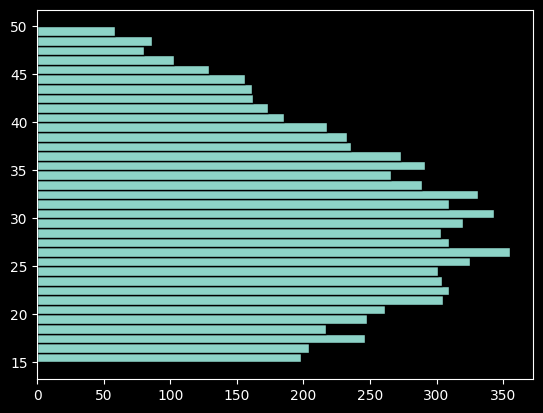

In [11]:
a = np.array(reproductive_cohort) 
plt.hist(a, bins = list(range(15,51,1)), orientation="horizontal", edgecolor="black")

plt.show()

#### Predicting prob distributions for next year based on TFR

In [12]:
tfr = 2.05
sex_ratio = 0.5 #Defined as chance of being female
new_females = 0

bins = int(max(reproductive_cohort))-int(min(reproductive_cohort))

counts, bin_edges = np.histogram(reproductive_cohort, bins=35)
indexed_counts = list(enumerate(counts))

for element in indexed_counts:
    rem_prod_age = 50-(element[0]+15)
    population = element[1]
    
    new_females += sex_ratio*((tfr*population)/rem_prod_age)

We are seeing the issue that the number is too high for the highest age cohort, as the model assumes a guaranteed child birth in the last reproductive year. This needs to be adjusted,

We create an Adjusted TFR, which is high for median ages and low for either ends of the distribution

In [13]:
tfr = 2.05
sex_ratio = 0.5 #Defined as chance of being female
new_females = 0

bins = int(max(reproductive_cohort))-int(min(reproductive_cohort))

counts, bin_edges = np.histogram(reproductive_cohort, bins=35)
indexed_counts = list(enumerate(counts))

for element in indexed_counts:
    age = element[0]+15
    rem_prod_age = 50-age
    population = element[1]
    
    scaling_factor = max(abs(age-35),1)
    adjusted_tfr = tfr*(1/scaling_factor)
    
    new_females += int(sex_ratio*((adjusted_tfr*population)/rem_prod_age))

In [14]:
new_females

129

#### Predicting the next generation's distribution
The assumption here are:
1. ```new_females``` are added to cohort age 0 (births)
2. All cohorts advance in age
3. Cohorts above a certain age get dropped (die)

In [15]:
import random
new_female_samples = [random.random() for _ in range(new_females)] #random.random() gives values between 0 and 1, which works for our use case
len(new_female_samples)

129

In [16]:
print(len(female_sample))
female_sample = female_sample + new_female_samples
print(len(female_sample))

9897
10026


In [17]:
bins = int(max(female_sample))-int(min(female_sample))
counts, bin_edges = np.histogram(female_sample, bins=bins)
# counts, bin_edges, len(counts)

In [18]:
from collections import deque

counts = deque(counts)
counts.rotate(1)
counts[0] = len(new_female_samples)

counts = list(counts)
len(counts)

68

In [19]:
bins

68

In [20]:
indexed_counts = list(enumerate(counts))
keys = [element[0] for element in indexed_counts]
values = [element[1] for element in indexed_counts]

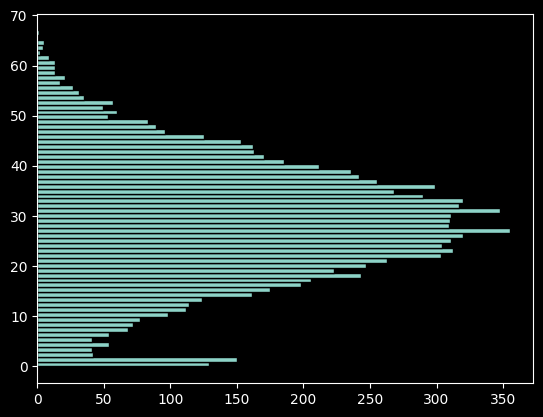

In [21]:
hh1 = plt.hist(keys, weights=values, bins=bins, orientation="horizontal", edgecolor="black")
plt.show()

#### Bringing everything together in a function

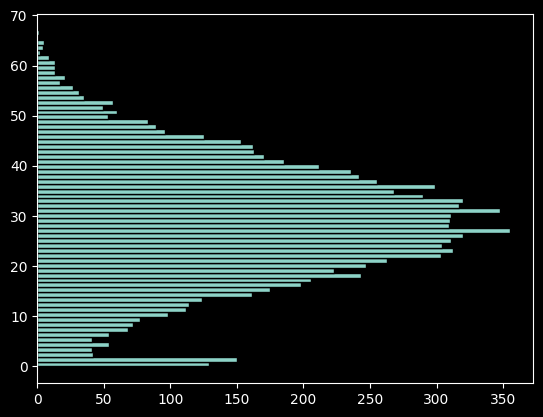

In [23]:
import random

tfr = 2.05
sex_ratio = 0.5 #Defined as chance of being female

def next_generation():
    
    bins = int(max(reproductive_cohort))-int(min(reproductive_cohort))

    counts, bin_edges = np.histogram(reproductive_cohort, bins=bins)
    indexed_counts = list(enumerate(counts))

    for element in indexed_counts:
        age = element[0]+15
        rem_prod_age = 50-age
        population = element[1]
    
    scaling_factor = max(abs(age-35),1)
    adjusted_tfr = tfr*(1/scaling_factor)
    
    new_females = 0
    new_females += int(sex_ratio*((adjusted_tfr*population)/rem_prod_age))
    
    new_female_samples = [random.random() for _ in range(new_females)] #random.random() gives values between 0 and 1, which works for our use case
    female_sample = female_sample + new_female_samples
    
    bins = int(max(female_sample))-int(min(female_sample))
    counts, bin_edges = np.histogram(female_sample, bins=bins)
    
    counts = deque(counts)
    counts.rotate(1)
    counts[0] = len(new_female_samples)
    counts = list(counts)
    
indexed_counts = list(enumerate(counts))
keys = [element[0] for element in indexed_counts]
values = [element[1] for element in indexed_counts]

hh1 = plt.hist(keys, weights=values, bins=bins, orientation="horizontal", edgecolor="black")
plt.show()

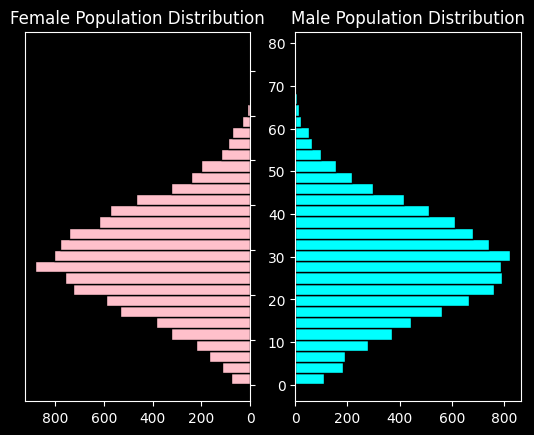

In [24]:
male_sample, female_sample = population_plotter(male_population_mean=28,
                                                male_population_sd=13,
                                                male_population_size=10000,
                                                female_population_mean=28,
                                                female_population_sd=12,
                                                female_population_size=10000,
                                               )

In [41]:
def next_generation(female_sample, male_sample, tfr, sex_ratio):
    
    reproductive_cohort = [element for element in female_sample if (element >=15 and element <50)]
    bins = int(max(reproductive_cohort))-int(min(reproductive_cohort))
    
    new_females = 0
    new_males = 0
    
    counts, bin_edges = np.histogram(reproductive_cohort, bins=bins)
    indexed_counts = list(enumerate(counts))

    for element in indexed_counts:
        age = element[0]+15
        rem_prod_age = 50-age
        population = element[1]
    
        scaling_factor = max(abs(age-35),1)
        adjusted_tfr = tfr*(1/scaling_factor)

        new_females += int(sex_ratio*((adjusted_tfr*population)/rem_prod_age))
        new_males += int((1-sex_ratio)*((adjusted_tfr*population)/rem_prod_age))
    
    new_female_samples = [random.random() for _ in range(new_females)] #random.random() gives values between 0 and 1, which works for our use case
    new_male_samples = [random.random() for _ in range(new_males)] #random.random() gives values between 0 and 1, which works for our use case
    
    female_sample = female_sample + new_female_samples
    male_sample = male_sample + new_male_samples
    
    #Aging
    female_sample = [element+1 for element in female_sample]
    male_sample = [element+1 for element in male_sample]
    
    
    #Death
    female_sample = [element for element in female_sample if element<=90]
    male_sample = [element for element in male_sample if element<=90]
    
    
    
#     bins = int(max(female_sample))-int(min(female_sample))
#     counts, bin_edges = np.histogram(female_sample, bins=bins)

#     counts = deque(counts)
#     counts.rotate(1)
#     counts[0] = len(new_female_samples)
#     counts = list(counts)
    
    return male_sample, female_sample

In [42]:
next_gen_male_sample, next_gen_female_sample = male_sample, female_sample

In [43]:
next_gen_male_sample, next_gen_female_sample = next_generation(next_gen_female_sample, next_gen_female_sample, tfr=2.05, sex_ratio=0.5)

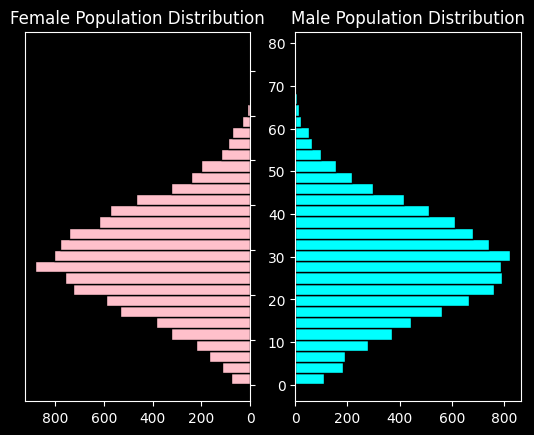

In [44]:
plt.style.use('dark_background')

ax1 = plt.subplot(1, 2, 2)
ax1.hist(male_sample, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
ax1.title.set_text("Male Population Distribution")


ax2 = plt.subplot(1, 2, 1)
ax2.hist(female_sample, bins=30, orientation="horizontal", edgecolor="black", color="pink")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_yticklabels([])
ax2.yaxis.tick_right()
ax2.title.set_text("Female Population Distribution")

plt.show()


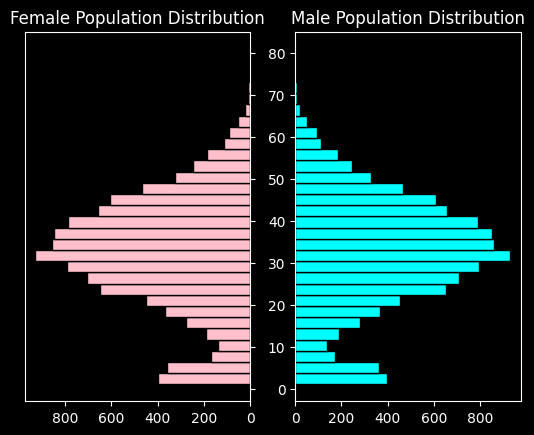

In [45]:
for times in range(5):
    next_gen_male_sample, next_gen_female_sample = next_generation(next_gen_female_sample, next_gen_female_sample, tfr=2.05, sex_ratio=0.5)

plt.style.use('dark_background')

ax1 = plt.subplot(1, 2, 2)
ax1.hist(next_gen_male_sample, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
ax1.title.set_text("Male Population Distribution")


ax2 = plt.subplot(1, 2, 1)
ax2.hist(next_gen_female_sample, bins=30, orientation="horizontal", edgecolor="black", color="pink")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_yticklabels([])
ax2.yaxis.tick_right()
ax2.title.set_text("Female Population Distribution")

plt.show()

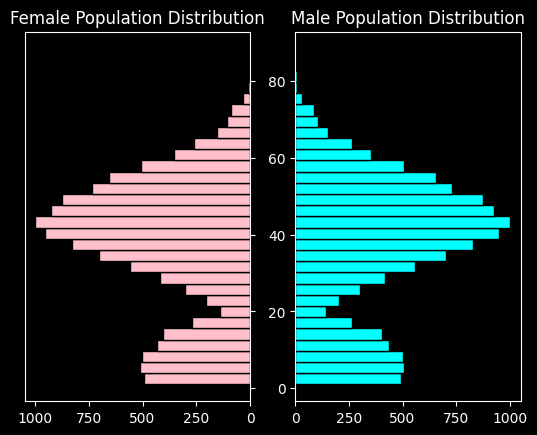

In [46]:
for times in range(10):
    next_gen_male_sample, next_gen_female_sample = next_generation(next_gen_female_sample, next_gen_female_sample, tfr=2.05, sex_ratio=0.5)

plt.style.use('dark_background')

ax1 = plt.subplot(1, 2, 2)
ax1.hist(next_gen_male_sample, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
ax1.title.set_text("Male Population Distribution")


ax2 = plt.subplot(1, 2, 1)
ax2.hist(next_gen_female_sample, bins=30, orientation="horizontal", edgecolor="black", color="pink")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_yticklabels([])
ax2.yaxis.tick_right()
ax2.title.set_text("Female Population Distribution")

plt.show()

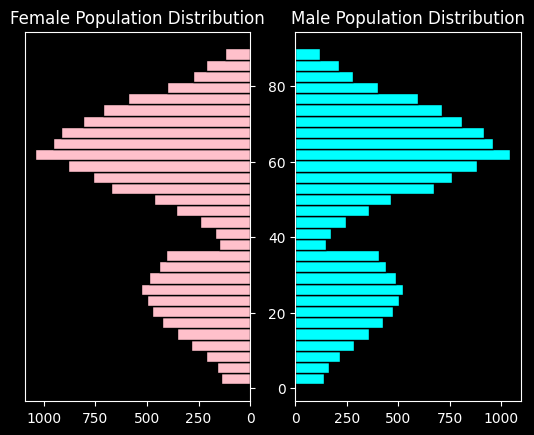

In [47]:
for times in range(20):
    next_gen_male_sample, next_gen_female_sample = next_generation(next_gen_female_sample, next_gen_female_sample, tfr=2.05, sex_ratio=0.5)

plt.style.use('dark_background')

ax1 = plt.subplot(1, 2, 2)
ax1.hist(next_gen_male_sample, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
ax1.title.set_text("Male Population Distribution")


ax2 = plt.subplot(1, 2, 1)
ax2.hist(next_gen_female_sample, bins=30, orientation="horizontal", edgecolor="black", color="pink")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_yticklabels([])
ax2.yaxis.tick_right()
ax2.title.set_text("Female Population Distribution")

plt.show()

## Functionalizing and modularizing

In [264]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [265]:
def pyramid_plot(male_sample, female_sample, bins):
    plt.style.use('dark_background')

    ax1 = plt.subplot(1, 2, 2)
    ax1.hist(male_sample, bins=30, orientation="horizontal", edgecolor="black", color="cyan")
    ax1.title.set_text("Male Population Distribution")


    ax2 = plt.subplot(1, 2, 1)
    ax2.hist(female_sample, bins=30, orientation="horizontal", edgecolor="black", color="pink")
    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_yticklabels([])
    ax2.yaxis.tick_right()
    ax2.title.set_text("Female Population Distribution")

    plt.show()

In [266]:
def next_generation(male_sample, female_sample, tfr, sex_ratio):
    
    reproductive_cohort = [element for element in female_sample if (element >=15 and element <50)]
    bins = int(max(reproductive_cohort))-int(min(reproductive_cohort))
    
    new_females = 0
    new_males = 0
    
    counts, bin_edges = np.histogram(reproductive_cohort, bins=bins)
    indexed_counts = list(enumerate(counts))

    for element in indexed_counts:
        age = element[0]+15
        rem_prod_age = 50-age
        population = element[1]
    
        scaling_factor = max(abs(age-35),1)
        adjusted_tfr = tfr*(1/scaling_factor)

        new_females += int(sex_ratio*((adjusted_tfr*population)/rem_prod_age))
        new_males += int((1-sex_ratio)*((adjusted_tfr*population)/rem_prod_age))
    
    new_female_samples = [random.random() for _ in range(new_females)] #random.random() gives values between 0 and 1, which works for our use case
    new_male_samples = [random.random() for _ in range(new_males)] #random.random() gives values between 0 and 1, which works for our use case
    
    female_sample = female_sample + new_female_samples
    male_sample = male_sample + new_male_samples
    
    #Aging
    female_sample = [element+1 for element in female_sample]
    male_sample = [element+1 for element in male_sample]
    
    
    #Death
    female_sample = [element for element in female_sample if element<=90]
    male_sample = [element for element in male_sample if element<=90]
    
    return male_sample, female_sample

In [267]:
def population_initialize(male_population_mean=28.2, male_population_sd=12, male_population_size=10000,
                       female_population_mean=28.2, female_population_sd=12, female_population_size=10000):

    male_sample = np.random.normal(male_population_mean, male_population_sd,male_population_size)
    female_sample = np.random.normal(female_population_mean, female_population_sd,female_population_size)

    #Removing negative values
    male_sample = [element for element in male_sample if element>0]
    female_sample = [element for element in female_sample if element>0]

    plt.show()
    return male_sample, female_sample

In [268]:
# Initializing the beginning population
next_generation_male_sample, next_generation_female_sample = population_initialize()

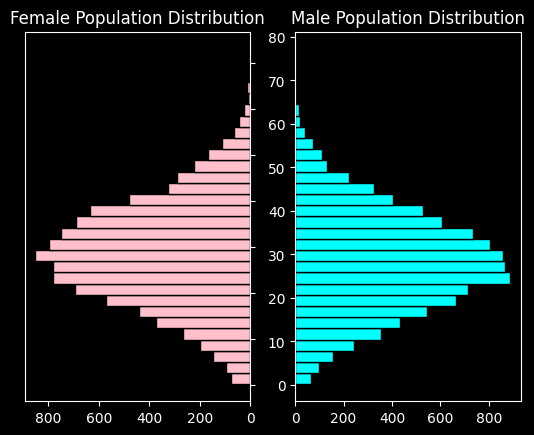

In [269]:
# Visualizing the beginning population
pyramid_plot(next_generation_male_sample, next_generation_female_sample, bins=30)

In [270]:
# Running the simulation for n generations and plotting the result
for times in range(100):
    next_generation_male_sample, next_generation_female_sample = next_generation(next_generation_female_sample,
                                                                                 next_generation_male_sample,
                                                                                 tfr=1.99,
                                                                                 sex_ratio=0.6)

In [271]:
# Plotting the resulting population pyramid
pyramid_plot(next_generation_male_sample, next_generation_female_sample, bins=30)

In [272]:
len(next_generation_male_sample), len(next_generation_female_sample)

(9904, 9915)

## Simulating a declining TFR

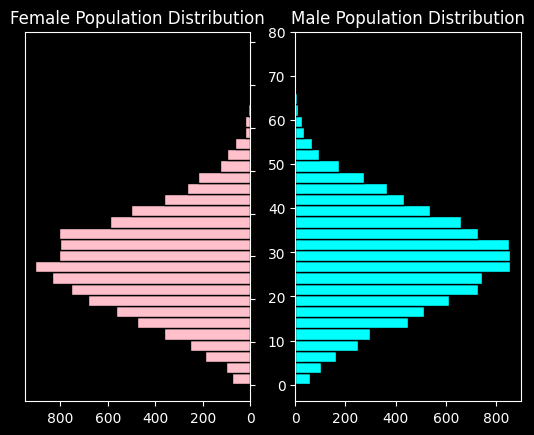

In [279]:
next_generation_male_sample, next_generation_female_sample = population_initialize()
pyramid_plot(next_generation_male_sample, next_generation_female_sample, bins=30)

tfr = 2.5
for times in range(10):
    tfr = tfr - 0.1
    next_generation_male_sample, next_generation_female_sample = next_generation(next_generation_female_sample,
                                                                                 next_generation_male_sample,
                                                                                 tfr=tfr,
                                                                                 sex_ratio=0.6)

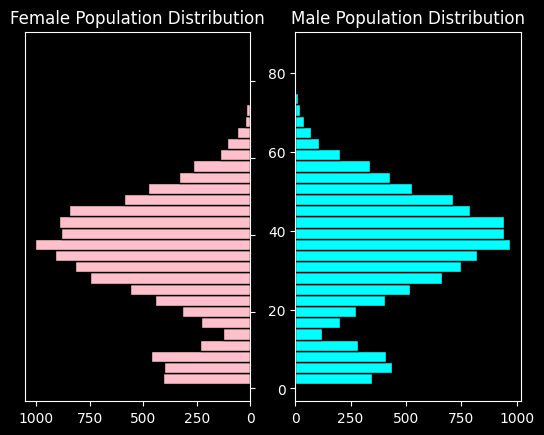

In [280]:
# Plotting the resulting population pyramid
pyramid_plot(next_generation_male_sample, next_generation_female_sample, bins=30)

In [281]:
len(next_generation_male_sample), len(next_generation_female_sample)

(11333, 11339)

## Simulating a declining sex ratio (unfavorable to females)

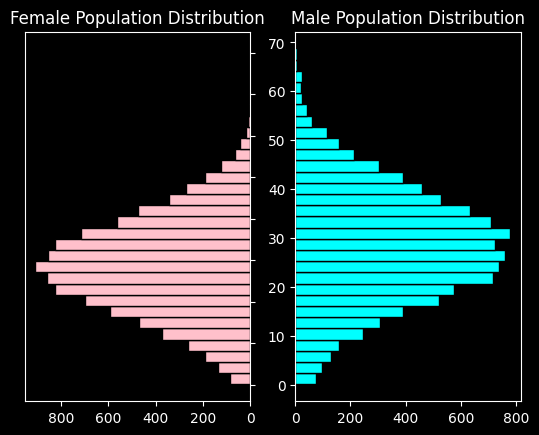

In [282]:
next_generation_male_sample, next_generation_female_sample = population_initialize()
pyramid_plot(next_generation_male_sample, next_generation_female_sample, bins=30)

tfr = 2.5
sex_ratio = 0.5

for times in range(10):
    sex_ratio = sex_ratio - 0.001
    next_generation_male_sample, next_generation_female_sample = next_generation(next_generation_female_sample,
                                                                                 next_generation_male_sample,
                                                                                 tfr=tfr,
                                                                                 sex_ratio=sex_ratio)

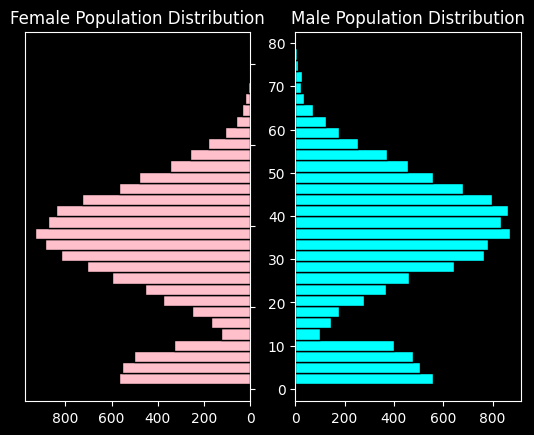

In [283]:
# Plotting the resulting population pyramid
pyramid_plot(next_generation_male_sample, next_generation_female_sample, bins=30)

In [284]:
len(next_generation_male_sample), len(next_generation_female_sample)

(11816, 11803)